![example](images/director_shot.jpeg)

# From Data to Drama: Leveraging Movie Trends for Microsoft's New Studio

**Authors:** Muiru Kamau
***

## Overview
***
The objective of this project is to analyze the current trends in the movie industry and identify the key success factors for creating box office hits. Microsoft has decided to enter the movie industry and launch a new movie studio, but lacks the necessary expertise in movie production. This project aims to provide actionable insights into the types of films that are currently performing well at the box office, and to help Microsoft determine what type of films they should create in order to achieve commercial success.

The project will begin by conducting a thorough analysis of data from Box office Mojo, IMDb and The movie Database for the 2014 - 2019 period, including revenue, genre. These insights will be used to develop a set of recommendations for Microsoft's new movie studio

## Business Problem

***

Business Problem: "Cracking the Code to Box Office Success: Genre Selection for Microsoft's New Movie Studio"

The objective of this business problem is to determine the optimal genre(s) for Microsoft's new movie studio to produce in order to achieve commercial success at the box office.

* Which genres have historically generated the highest average gross earnings?

 * Which genres have received the highest average ratings from audiences and critics?

* Which genres have the highest total gross earnings overall?

* Which movie genre has the highest number of movies produced?

***

## Data Understanding

We are going to be working with movie datasets from three sources

1. [TheMovieDB](https://www.themoviedb.org/):We are only intrested in two columns only <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">title</span> and <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">vote_average.</span>


2. [Box office mojo](https://www.boxofficemojo.com/): Every record represents a movie, containing details about that particular film such as its <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">domestic_gross.</span>


 3. [IMDB](https://www.imdb.com/) : the database contains multiple tables relating to movie attributes, eg ratings.<span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;"> Movie_basics</span> and  <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">movie_ratings</span> will be useful.

Box office mojo and The Movie DB are csv files we can open using <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">pd.read_csv</span>. IMDB is located in a zipped SQlite database, we must unzip and then query using SQlite.

***

We also have two other datasets that I won't be exploring but were provided for this analysis
 
 1.[The Numbers](https://www.the-numbers.com/)

 2. [Rotten Tomatoes](https://www.rottentomatoes.com/)

## Import and Data description

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sqlite3

%matplotlib inline

In [3]:
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')
    
# Created a new file called im.db
# Added the file to .gitignore because it's too big to upload to GitHub

In [4]:
# Connect to the SQLite database file named "im.db" located in the "zippedData" directory
con = sqlite3.connect('zippedData/im.db')

In [5]:
# Read all tables from the "sqlite_schema" table in the SQLite database connected to by "con"

pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type='table'
""", con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
# Get a preview of the data from the movie_basics table 

query =  """
SELECT 
* FROM 
movie_basics
"""

movie_basics = pd.read_sql(query, con) 
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
# Use .info() method 

movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# Preview data from the movie_ratings table 

query =  """
SELECT 
* FROM 
movie_ratings
"""

movie_ratings = pd.read_sql(query, con) 
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
# Use .info() method 

movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
# Use zipped Data folder path and turn into a dataframe to better see file contents

movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
# Read and open The Numbers dataset

df_tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# Use info() method

df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
# Read and open TMDB dataset

tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
# Use .info() method

tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## Data Preparation

With our improved comprehension of the data and its intended purpose, the next step is to start cleaning and organizing it in preparation for analysis.

***




### Clean TheMovieDB Dataset
We only want two columns <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">title</span> and <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">vote_average.</span>



In [16]:
tmdb_movies = tmdb_movies[['title', 'vote_average']]
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


### Clean Box Office Mojo Dataset

***

Select only the columns <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">title</span> and <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">domestic_gross.</span>

Create a new column named <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;"> gross_mil</span> in the <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;"> movie_gross</span> dataframe which contains the domestic gross earnings per million. We achieve this by dividing the 'domestic_gross' column by 1000000.

We reassign <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;"> title</span> and 
<span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">gross_mil</span>
columns to <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;">movie_gross.</span>

We then drop any rows that have missing values (NaNs) in the <span style="background-color: #3d3d3d; color: #ffffff; padding: 2px 5px; border-radius: 3px;"> movie_gross</span>dataframe.



In [17]:
# Selecting only the 'title' and 'domestic_gross' columns from the 'movie_gross' dataframe 
# and reassigning it to the 'movie_gross' variable.
movie_gross = movie_gross[['title', 'domestic_gross']]


In [18]:
# This code creates a new column in the 'movie_gross' dataframe called 'gross_mil', 
# which contains the domestic gross earnings per million for each movie in the 'domestic_gross' column.
movie_gross['gross_mil'] = (movie_gross['domestic_gross'])/1000000


In [19]:
# Dropping missing values
movie_gross = movie_gross[['title', 'gross_mil']]
movie_gross.dropna(inplace = True)

### Merging and Cleaning Movie basics and Movie ratings

In [20]:
imdb_ratings_basics = movies_w_ratings_imdb = pd.read_sql("""
SELECT * FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
""" , con)

In [21]:
imdb_ratings_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [22]:
imdb_ratings_basics = imdb_ratings_basics.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])

In [23]:
imdb_ratings_basics.rename(columns = {'primary_title':'title'}, inplace = True)

In [24]:
imdb_ratings_basics.head()

,movie_id,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [25]:
imdb_ratings_basics_null = imdb_ratings_basics.dropna(inplace = True)


In [26]:
imdb_ratings_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73052 non-null  object 
 1   title          73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [27]:
movies = imdb_ratings_basics.merge(tmdb_movies, on = 'title').merge(movie_gross, on = 'title')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [28]:
movies.head()

,movie_id,title,start_year,genres,averagerating,vote_average,gross_mil
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,6.6,1.100
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,0.744
2,tt4339118,On the Road,2014,Drama,6.0,5.6,0.744
3,tt5647250,On the Road,2016,Drama,5.7,5.6,0.744
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,58.200


In [29]:
# Compute the average rating based on IMDb and The Movie Database ratings
movies.loc[:, 'average_rating'] = (movies.loc[:, 'averagerating'] + movies.loc[:, 'vote_average']) / 2

# Drop the columns for the original ratings
movies.drop(columns=['averagerating', 'vote_average'], inplace=True)

# Display the first few rows of the updated DataFrame
movies.head()


,movie_id,title,start_year,genres,gross_mil,average_rating
0,tt0315642,Wazir,2016,"Action,Crime,Drama",1.100,6.85
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",0.744,5.85
2,tt4339118,On the Road,2014,Drama,0.744,5.80
3,tt5647250,On the Road,2016,Drama,0.744,5.65
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.200,7.20


In [30]:
# Create a smaller dataframe of movies with a rating of at least 7.0 and gross earnings of at least 27.9 million
movies_mini = movies[(movies['average_rating'] >= 7.0) &
                        (movies['gross_mil'] >= 30) &
                        (movies['start_year'] > 2013)].copy()

# Display the new dataframe
movies_mini


,movie_id,title,start_year,genres,gross_mil,average_rating
9,tt3079380,Spy,2015,"Action,Comedy,Crime",110.8,7.00
38,tt0451279,Wonder Woman,2017,"Action,Adventure,Fantasy",412.6,7.40
42,tt4283448,Wonder Woman,2016,"Documentary,Drama,Sport",412.6,7.10
46,tt0455944,The Equalizer,2014,"Action,Crime,Thriller",101.5,7.20
66,tt9906218,Unstoppable,2019,Documentary,81.6,7.25
...,...,...,...,...,...,...
3198,tt6644200,A Quiet Place,2018,"Drama,Horror,Sci-Fi",188.0,7.45
3225,tt6966692,Green Book,2018,"Biography,Comedy,Drama",85.1,8.30
3242,tt7349662,BlacKkKlansman,2018,"Biography,Crime,Drama",49.3,7.55
3245,tt7401588,Instant Family,2018,"Comedy,Drama",67.4,7.50


In [31]:
movies_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 9 to 3251
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        185 non-null    object 
 1   title           185 non-null    object 
 2   start_year      185 non-null    int64  
 3   genres          185 non-null    object 
 4   gross_mil       185 non-null    float64
 5   average_rating  185 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB


In [32]:
# Split the genre column for analysis, creating a new row for each genre
movies_mini = movies_mini.assign(genres=movies_mini['genres'].str.split(',')).explode('genres').reset_index(drop=True)

# Display the first few rows of the updated dataframe
movies_mini.head()


,movie_id,title,start_year,genres,gross_mil,average_rating
0,tt3079380,Spy,2015,Action,110.8,7.0
1,tt3079380,Spy,2015,Comedy,110.8,7.0
2,tt3079380,Spy,2015,Crime,110.8,7.0
3,tt0451279,Wonder Woman,2017,Action,412.6,7.4
4,tt0451279,Wonder Woman,2017,Adventure,412.6,7.4


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [33]:
# Create a new DataFrame with only the 'genres' and 'title' columns
top_genre = movies_mini[['genres', 'title']]

# Display information about the new DataFrame
top_genre.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  483 non-null    object
 1   title   483 non-null    object
dtypes: object(2)
memory usage: 7.7+ KB


In [34]:
# Create a new DataFrame with the count of movies per genre
top_genre = (pd.DataFrame(movies_mini.groupby('genres', as_index=False).title.nunique()))
top_genre = top_genre.rename(columns={'title': 'movie_count'}).sort_values(by='movie_count', ascending=False)

# Display the new DataFrame
print(top_genre)


         genres  movie_count
7         Drama           77
1     Adventure           47
0        Action           44
4        Comedy           36
3     Biography           26
5         Crime           21
16       Sci-Fi           16
18     Thriller           14
10      History           12
11       Horror           11
14      Mystery           11
2     Animation           11
15      Romance           10
9       Fantasy            7
8        Family            6
6   Documentary            6
17        Sport            5
12        Music            3
13      Musical            1


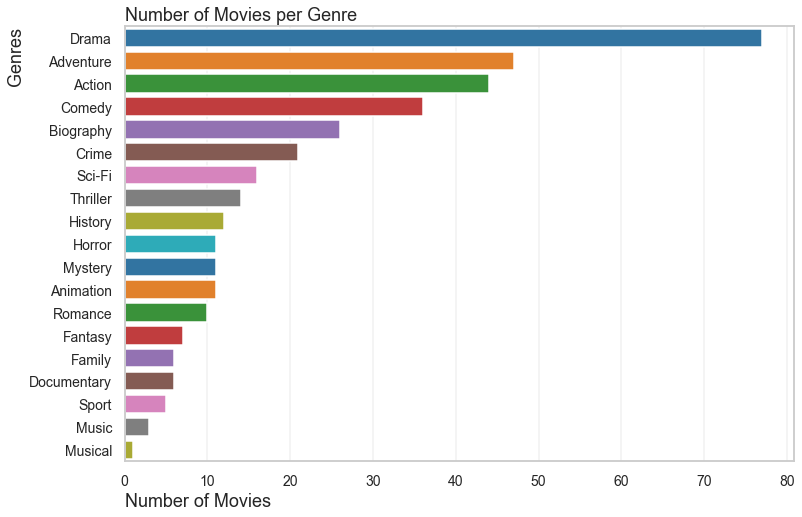

In [35]:
# Plot a bar chart of the number of movies per genre
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.set_context('talk', rc={'grid.linewidth': 0.4})

# Sort the genres by frequency
top_genre = pd.DataFrame(movies_mini.groupby('genres', as_index=False).title.nunique()) \
    .sort_values(by='title', ascending=False)

# Define the colors for each genre
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create the bar chart
sns.barplot(x='title', y='genres', data=top_genre, palette=colors)

# Add titles and axis names
plt.title('Number of Movies per Genre', loc='left')
plt.xlabel('Number of Movies', loc='left')
plt.ylabel('Genres', loc='top')
plt.tick_params(labelsize=14)

# Show the plot
plt.show()


In [36]:
#Create a new dataframe with average gross earning per genre
top_gross = movies_mini[['title', 'genres', 'gross_mil']]
top_gross = top_gross.groupby('genres', as_index = False)['gross_mil'].mean().sort_values('gross_mil', ascending=False)
top_gross

,genres,gross_mil
16,Sci-Fi,287.390000
2,Animation,273.150000
1,Adventure,263.701667
9,Fantasy,259.420000
0,Action,250.750000
13,Musical,174.300000
4,Comedy,165.137778
18,Thriller,154.518750
8,Family,153.237500
11,Horror,152.746154


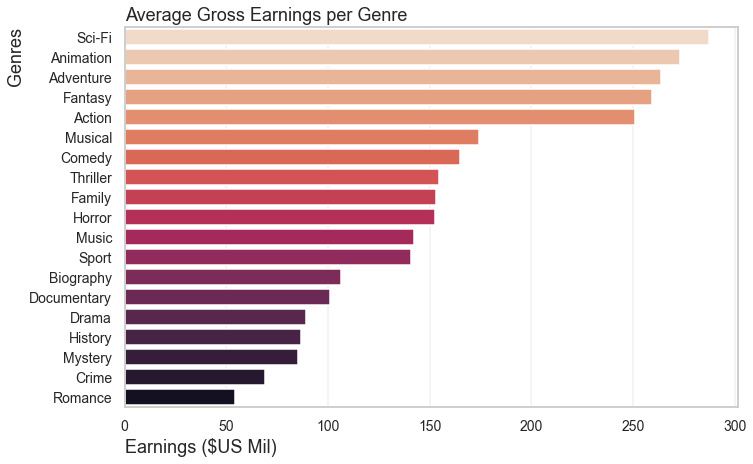

In [37]:
# Create a bar chart for average gross earnings per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context('talk', rc={'grid.linewidth': 0.4})

# Order the values by gross earnings
ordered_df = top_gross.sort_values(by='gross_mil', ascending=False)

# Set the color palette
palette = sns.color_palette("rocket_r", len(ordered_df))

# Create the bar chart
sns.barplot(x='gross_mil', y='genres', data=ordered_df, palette=palette)

# Add titles and axis names
plt.title('Average Gross Earnings per Genre', loc='left')
plt.xlabel('Earnings ($US Mil)', loc='left')
plt.ylabel('Genres', loc='top')
plt.tick_params(labelsize=14)

# Show the plot
plt.show()


In [43]:
# Create a new dataframe with the average rating of each genre, only for genres with 7 or more ratings
genre_ratings = movies_mini.groupby('genres').average_rating.agg(['count','mean']).sort_values(
    by='mean', ascending=False)
popular_genres = genre_ratings[genre_ratings['count'] >= 7]

genre_ratings

,count,mean
genres,,
Musical,2,7.800000
Music,4,7.762500
Sci-Fi,20,7.710000
Biography,36,7.641667
Documentary,8,7.631250
History,19,7.626316
Crime,30,7.615000
Animation,16,7.609375
Adventure,60,7.598333


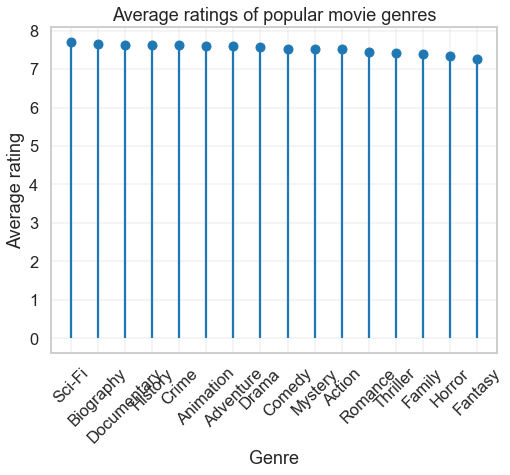

In [46]:
import matplotlib.pyplot as plt

# Create a stem plot of popular genres and their average ratings
fig, ax = plt.subplots(figsize=(8, 6))
ax.stem(popular_genres.index, popular_genres['mean'], use_line_collection=True, linefmt='-', markerfmt='o', basefmt=' ')

# Add chart labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Average rating')
ax.set_title('Average ratings of popular movie genres')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [38]:
gross_earnings = movies_mini[['genres', 'gross_mil', 'start_year']]
gross_earnings = gross_earnings[(gross_earnings['gross_mil'] > 150) &
(gross_earnings['start_year'] > 2012)]

gross_earnings.head()

,genres,gross_mil,start_year
3,Action,412.6,2017
4,Adventure,412.6,2017
5,Fantasy,412.6,2017
6,Documentary,412.6,2016
7,Drama,412.6,2016


In [39]:
# Group the data by genre and calculate the sum of gross earnings in millions
gross_earnings = gross_earnings.groupby('genres', as_index = False).sum()

# Convert gross earnings to billions
gross_earnings['gross_bil'] = (gross_earnings['gross_mil'])/1000

# Sort the data by gross earnings in descending order
gross_earnings.sort_values('gross_mil', ascending = False, inplace = True)

# Drop the start_year column
gross_earnings.drop(columns = ['start_year'], inplace = True)

# Print the updated dataframe
gross_earnings

,genres,gross_mil,gross_bil
1,Adventure,14755.5,14.7555
0,Action,12545.8,12.5458
4,Comedy,6000.1,6.0001
16,Sci-Fi,5124.7,5.1247
2,Animation,4322.4,4.3224
7,Drama,4038.7,4.0387
9,Fantasy,2373.3,2.3733
3,Biography,2294.0,2.2940
18,Thriller,1767.0,1.7670
11,Horror,1438.4,1.4384


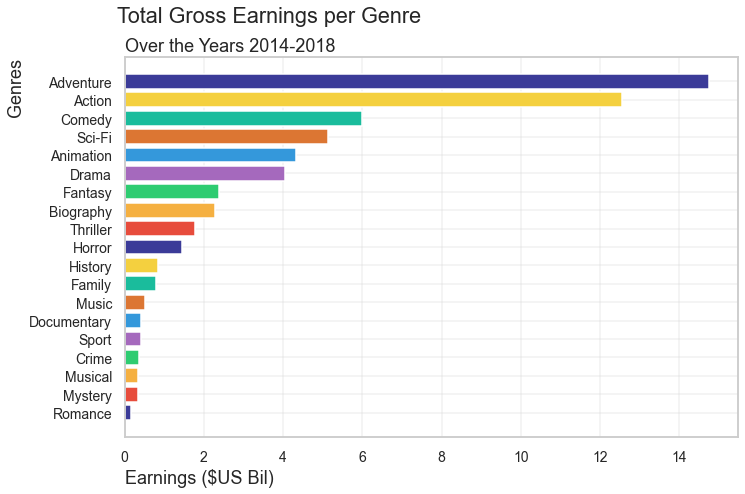

In [40]:
# Create a dataframe with title, genre, and gross earnings from 2013-2018
gross_earnings = movies_mini[['genres', 'gross_mil', 'start_year']]
gross_earnings = gross_earnings[(gross_earnings['gross_mil'] > 150) &
                                (gross_earnings['start_year'] > 2012)]

# Group by genre and calculate total gross earnings in billions
gross_earnings = gross_earnings.groupby('genres', as_index=False).sum()
gross_earnings['gross_bil'] = gross_earnings['gross_mil'] / 1000
gross_earnings.sort_values('gross_mil', ascending=False, inplace=True)
gross_earnings.drop(columns=['start_year'], inplace=True)

# Plot the total gross earnings per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context('talk', rc={'grid.linewidth': 0.4})

# Reorder it based on the values
ordered_df = gross_earnings.sort_values(by='gross_bil')
my_range = range(1, len(ordered_df.index) + 1)

# Create a custom color palette
colors = ['#3B3B98', '#E74C3C', '#F5B041', '#2ECC71', '#A569BD', '#3498DB', '#DC7633', '#1ABC9C', '#F4D03F']

# Create a horizontal bar plot with custom color palette
plt.barh(y=ordered_df['genres'], width=ordered_df['gross_bil'], color=colors)

# Add titles and axis names
plt.suptitle('Total Gross Earnings per Genre', horizontalalignment='right')
plt.title('Over the Years 2014-2018', loc='left')
plt.xlabel('Earnings ($US Bil)', loc='left')
plt.ylabel('Genres', loc='top')
plt.tick_params(labelsize=14)

# Show the plot
plt.show()


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***